## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2, os
import random
from keras.utils import to_categorical

## Import Dataset

In [2]:
data_path = r"C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages"


categories = os.listdir(data_path) 
labels = np.arange(len(categories))     
label_dict = dict(zip(categories, labels))    

print(categories)
print(labels)
print(label_dict)

['Cat', 'Dog']
[0 1]
{'Cat': 0, 'Dog': 1}


## Make The Dataset

In [3]:
img_size = 224                                            # This 224 is standard size for MobileNet Pre trained Neural Network                                 

data = []
target = []

for category in categories:
    
    folder_path = os.path.join(data_path, category)         
    img_names = os.listdir(folder_path)                     
    
    for img_name in random.sample(img_names, 1000):        # Get randomely selected 1000 images
        img_path = os.path.join(folder_path, img_name)
        
        try:
            img = cv2.imread(img_path)
            # cv2.imshow("LIVE", img)                         
            # cv2.waitKey(100)    
            resized = cv2.resize(img, (img_size, img_size))
            cv2.imshow("LIVE", resized)                     # See loaded iamges previews       
            cv2.waitKey(100)                           
        
            data.append(resized)                  
            target.append(label_dict[category])              
        
        except Exception as error:
            print(img_path, error)

C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages\Cat\850.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

C:\\Users\\DELL\\ML-DL\\Edxcope\\datasets\\catsanddogs_5340\\PetImages\Dog\11702.jpg OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [4]:
# convert feature and target to arrays
data = np.array(data)
target = np.array(target)

In [5]:
print(data.shape)
print(target.shape)

(1998, 224, 224, 3)
(1998,)


## Visualization

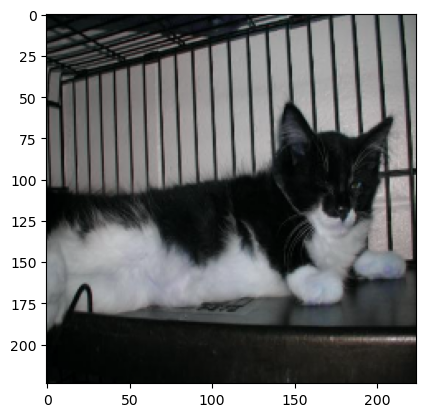

In [6]:
plt.imshow(data[200])
plt.show()

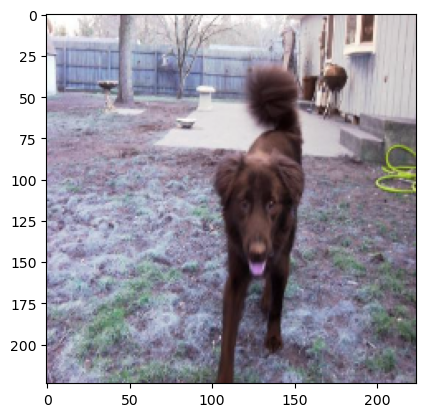

In [7]:
plt.imshow(data[1000])
plt.show()

## Data Normalization 

In [8]:
data_new = data / 255.0  

print(data_new.shape)

(1998, 224, 224, 3)


## Catergorical Encoding

In [9]:
target_new = to_categorical(target)

## Save Datasets

In [10]:
np.save("data-mobile-net", data_new)
np.save("target-mobile-net", target_new)